In [1]:
import Pkg

In [2]:
#Pkg.add("PythonCall")

In [3]:
#Pkg.add("KrylovKit")

In [4]:
#Pkg.add("SparseArrays")

In [5]:
using Bloqade
using PythonCall
using KrylovKit
using SparseArrays

plt = pyimport("matplotlib.pyplot");


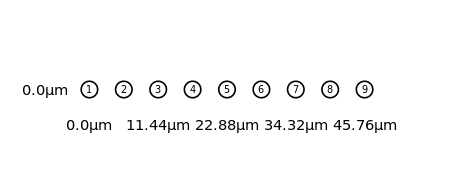

In [6]:
nsites = 9
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)



In [7]:
Ω = 2π * 4
Δ_step = 30
Δ = LinRange(-2π * 10, 2π * 10, Δ_step);

In [8]:
density_g = zeros(Δ_step, nsites)

for ii in 1:Δ_step
    h_ii = rydberg_h(atoms; Δ = Δ[ii], Ω) # create the Rydberg Hamiltonian
    h_m = mat(h_ii) # convert the Hamiltonian into a matrix
    vals, vecs, info = KrylovKit.eigsolve(h_m, 1, :SR) # find the ground state eigenvalue and eigenvector
    g_state = ArrayReg(vecs[1]) # creates the initial state with all atoms in ``| 0 \rangle`` state

    for jj in 1:nsites
        density_g[ii, jj] = rydberg_density(g_state, jj) # measure the density of Rydberg excitations on each site
    end
end



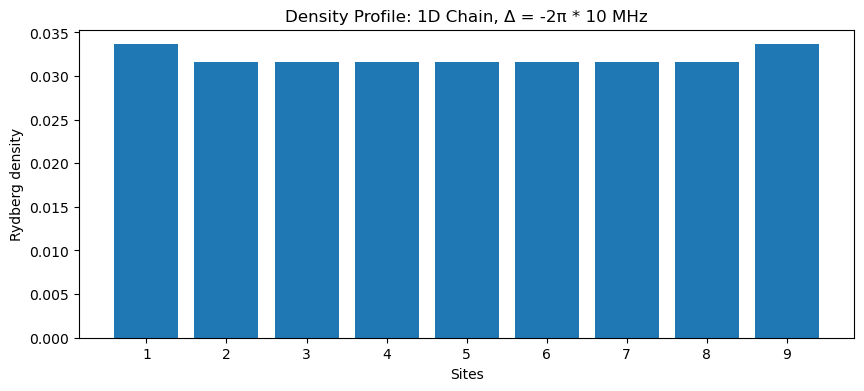

In [9]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[1, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = -2π * 10 MHz")
fig

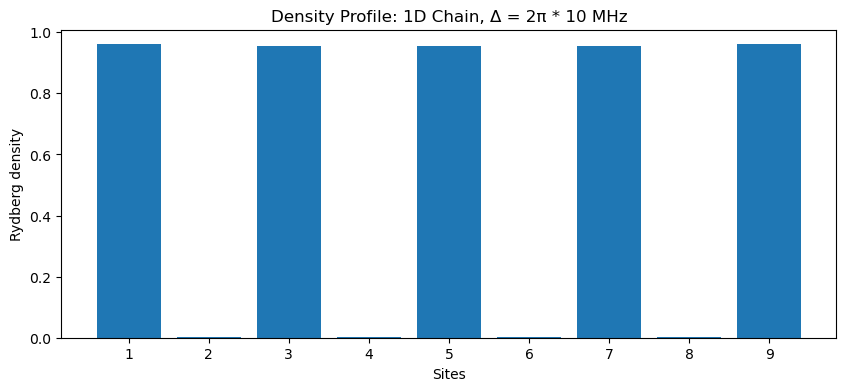

In [10]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[30, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = 2π * 10 MHz")
fig

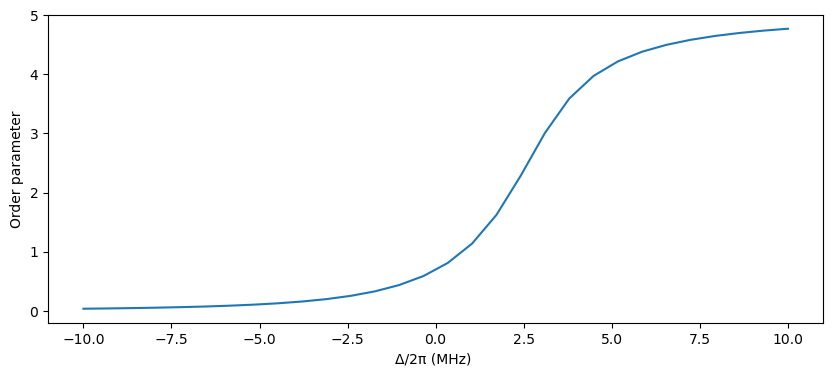

In [11]:
order_para = map(1:Δ_step) do ii
    return sum(density_g[ii, 1:2:nsites]) - sum(density_g[ii, 2:2:nsites])
end

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(Δ / 2π, order_para)
ax.set_xlabel("Δ/2π (MHz) ")
ax.set_ylabel("Order parameter")
fig

In [12]:
total_time = 3.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, 2.1, 2.2, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);

In [13]:
U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, 2.1, total_time], values = [U1, U1, U2, U2]);



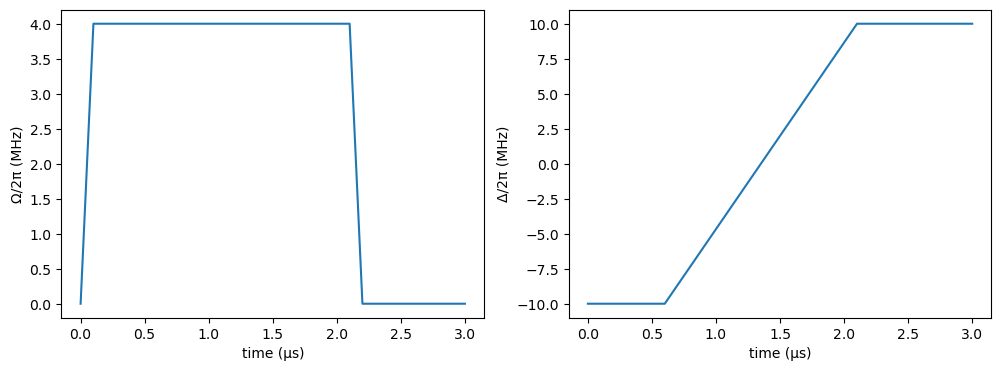

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig